# Importing Libraries

In [1]:
import ase.io # for reading *.xyz
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting error distribution
import numpy as np

# Setting Variables and Functions

In [2]:
DATASET_LOCATION = "../data_structures_errors.xyz" # should be in the same directory as the repository

In [3]:
def sort_plot_df(df, sort_method): # to sort df by certain column and display the scatter plot
    df_sorted = df.sort_values(by=[sort_method])

    plt.figure(figsize=(20,10))
    plt.xlabel(sort_method.capitalize())
    plt.ylabel("Energy (Error)")

    plt.ylim(-1.1*df["energy (error)"].abs().max(), 1.1*df["energy (error)"].abs().max())

    # plt.plot(df_sorted[sort_method], df_sorted['energy (error)']) # having lines crowds the entire graph
    plt.scatter(df_sorted[sort_method], df_sorted['energy (error)'], s=10)
    plt.axhline(y=0, color='r', linestyle='--')

    plt.show()

# Reading and Importing Dataset

In [4]:
dataset_list = list(ase.io.iread(filename=DATASET_LOCATION, format="extxyz")) # reading *.xyz file as a generator, then converting into list
df = pd.DataFrame(dataset_list)

In [17]:
df["number of atoms"] = [dataset_list[i].get_global_number_of_atoms() for i in range(len(dataset_list))]
df["chemical formula"] = [dataset_list[i].get_chemical_formula() for i in range(len(dataset_list))]

df["Lattice (unit cell with three vectors)"] = [dataset_list[i].get_cell()[:] for i in range(len(dataset_list))]
df["surface area (from first two vectors)"] = [np.linalg.norm(np.cross(dataset_list[i].get_cell()[0], dataset_list[i].get_cell()[1])) for i in range(len(dataset_list))]
df["Lattice vector length 3 (thickness)"] = [dataset_list[i].cell.cellpar()[2] for i in range(len(dataset_list))]
df["volume of unit cell (derived from Lattice)"] = [dataset_list[i].get_cell().volume for i in range(len(dataset_list))]

df["energy (error)"] = [dataset_list[i].info["energy"] for i in range(len(dataset_list))]
# Properties part not impt; pbc is "T T T" for all

display(df.head())
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,...,number of atoms,chemical formula,Lattice (unit cell with three vectors),Lattice vector length 1,Lattice vector length 2,Lattice vector length 3,volume of unit cell (derived from Lattice),energy (error),surface area (from first two vectors),Lattice vector length 3 (thickness)
0,"Atom('Al', [7.02555561, 0.0, 12.73458958], ind...","Atom('Al', [6.96548843, 10.95924854, 17.195571...","Atom('Al', [1.07926452, 5.47962427, 14.9782791...","Atom('Al', [-1.92391455, 13.69906044, 18.33061...","Atom('Al', [4.02237654, 8.21943665, 16.0869255...","Atom('Al', [9.96866703, 2.73981214, 13.8432350...","Atom('Al', [3.7433207, 12.48701859, 14.1275119...","Atom('Al', [9.68961143, 7.00739479, 11.8838224...","Atom('Al', [0.84525955, 1.52777028, 17.5194454...","Atom('Al', [-2.17380166, 12.64488316, 13.75287...",...,86,HAl60NRh24,"[[11.832514762878418, 0.0, -0.0263979993760585...",11.832544,16.758482,31.385263,6104.848367,0.325074,194.993247,31.385263
1,"Atom('Zr', [5.31270552, 11.38425636, 12.790607...","Atom('Zr', [5.31270552, 4.67047501, 12.7906074...","Atom('Zr', [2.12508202, 4.67047501, 10.9502325...","Atom('Zr', [8.50032902, 11.38425636, 10.950232...","Atom('Zr', [7.43778753, 8.75708675, 12.7906074...","Atom('Zr', [1.06254113, 2.04330564, 12.7906074...","Atom('Zr', [4.25016451, 2.04330564, 10.9502315...","Atom('Zr', [4.25016451, 8.75708675, 10.9502315...","Atom('Zr', [5.31270552, 11.38425636, 16.471357...","Atom('Zr', [5.31270552, 4.67047501, 16.4713573...",...,85,C2HN32O2Se16Zr32,"[[12.750493049621582, 0.0, 0.0], [3.1876232624...",12.750493,13.922907,29.446003,5041.392243,-1.486445,172.808649,29.446003
2,"Atom('Ag', [1.99755764, 0.0, 12.556077], index=0)","Atom('Ag', [1.99755764, 0.0, 16.55119133], ind...","Atom('Ag', [1.99755764, 0.0, 20.54630661], ind...","Atom('Ag', [5.99267292, 0.0, 12.556077], index=3)","Atom('Ag', [5.99267292, 0.0, 16.55119133], ind...","Atom('Ag', [5.99267292, 0.0, 20.54630661], ind...","Atom('Ag', [9.9877882, 0.0, 12.556077], index=6)","Atom('Ag', [9.9877882, 0.0, 16.55119133], inde...","Atom('Ag', [9.9877882, 0.0, 20.54630661], inde...","Atom('P', [0.0, 3.52585888, 10.55851936], inde...",...,66,H2Ag9OP9Pd45,"[[11.985345840454102, 0.0, 0.0], [0.0, 7.05171...",11.985346,8.104793,35.956036,3038.906189,0.198341,97.138747,35.956036
3,"Atom('Hf', [9.38242626, 12.50322628, 14.585413...","Atom('Hf', [6.35710812, 3.12580657, 18.5775795...","Atom('Hf', [7.86976767, 7.81451654, 21.8971786...","Atom('Hf', [6.96020222, 13.28467846, 19.901096...","Atom('Hf', [3.93488359, 3.90725827, 23.8932628...","Atom('Hf', [5.44754267, 8.59596825, 16.5814971...","Atom('Hf', [6.20387268, 10.94032288, 18.241296...","Atom('Hf', [3.17855406, 1.56290329, 22.2334613...","Atom('Hf', [4.69121313, 6.25161314, 14.9216957...","Atom('Hf', [5.60077858, 0.7814517, 16.91777992...",...,62,C2H5Hf30OSn24,"[[8.023002624511719, 0.0, -3.6558828353881836]...",8.816692,14.795323,42.525463,4799.108881,-5.876447,124.520928,42.525463
4,"Atom('Tc', [5.52350187, 3.18899536, 15.7963838...","Atom('Tc', [8.28525257, 7.9724884, 20.15400696...","Atom('Tc', [2.76175094, 1.59449768, 17.9751968...","Atom('Tc', [5.52350187, 6.37799072, 17.9751968...","Atom('Tc', [5.52350187, 3.18899536, 20.1540069...","Atom('Tc', [8.28525257, 7.9724884, 24.51163101...","Atom('Tc', [2.76175094, 1.59449768, 22.3328189...","Atom('Tc', [5.52350187, 6.37799072, 22.3328189...","Atom('Tc', [11.04700375, 3.18899536, 15.796383...","Atom('Tc', [13.80875492, 7.9724884, 20.1540069...",...,67,CH2Os48Tc16,"[[11.047003746032715, 0.0, 0.0], [5.5235018730...",11.047004,11.875402,34.860985,3684.336555,-2.103216,116.133437,34.860985


(460333, 235)


# Distribution of Error when Sorted by Volume of Unit Cell

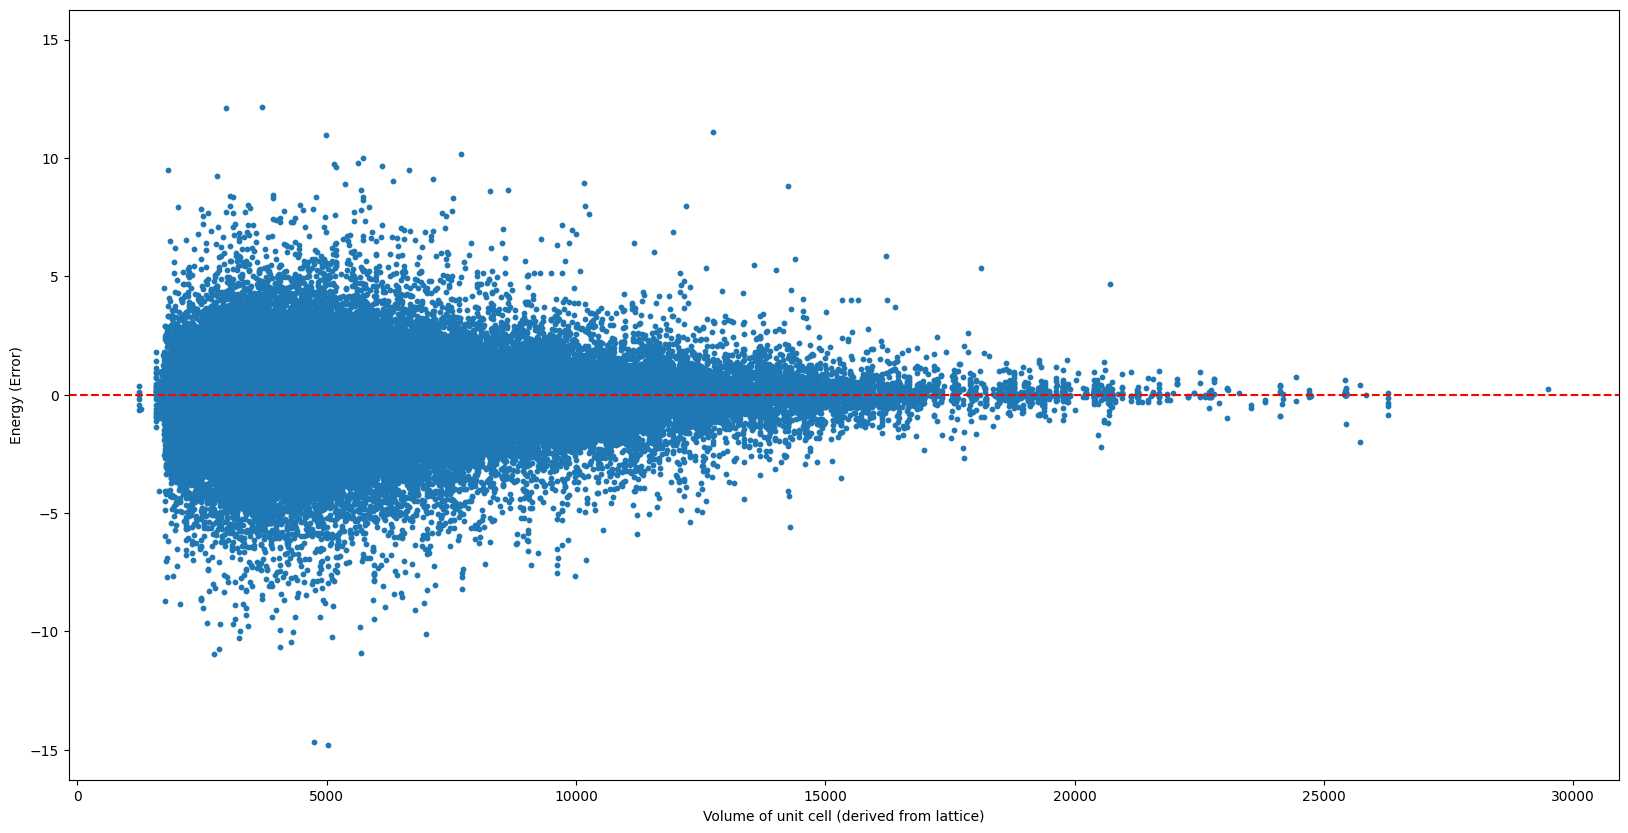

In [6]:
sort_plot_df(df, "volume of unit cell (derived from Lattice)")
# sort_plot_df(df, "number of atoms") # no trend

# possible way of extracting data out from Atom object
# print(df[0][0])
# print(df[0][0].symbol)
# print(df[0][0].position)
# display(df.describe())

# Distribution of Error when Sorted by Unit Cell Vectors

get area from 1stand second since that's always the plane the adsrobate is on

thickness

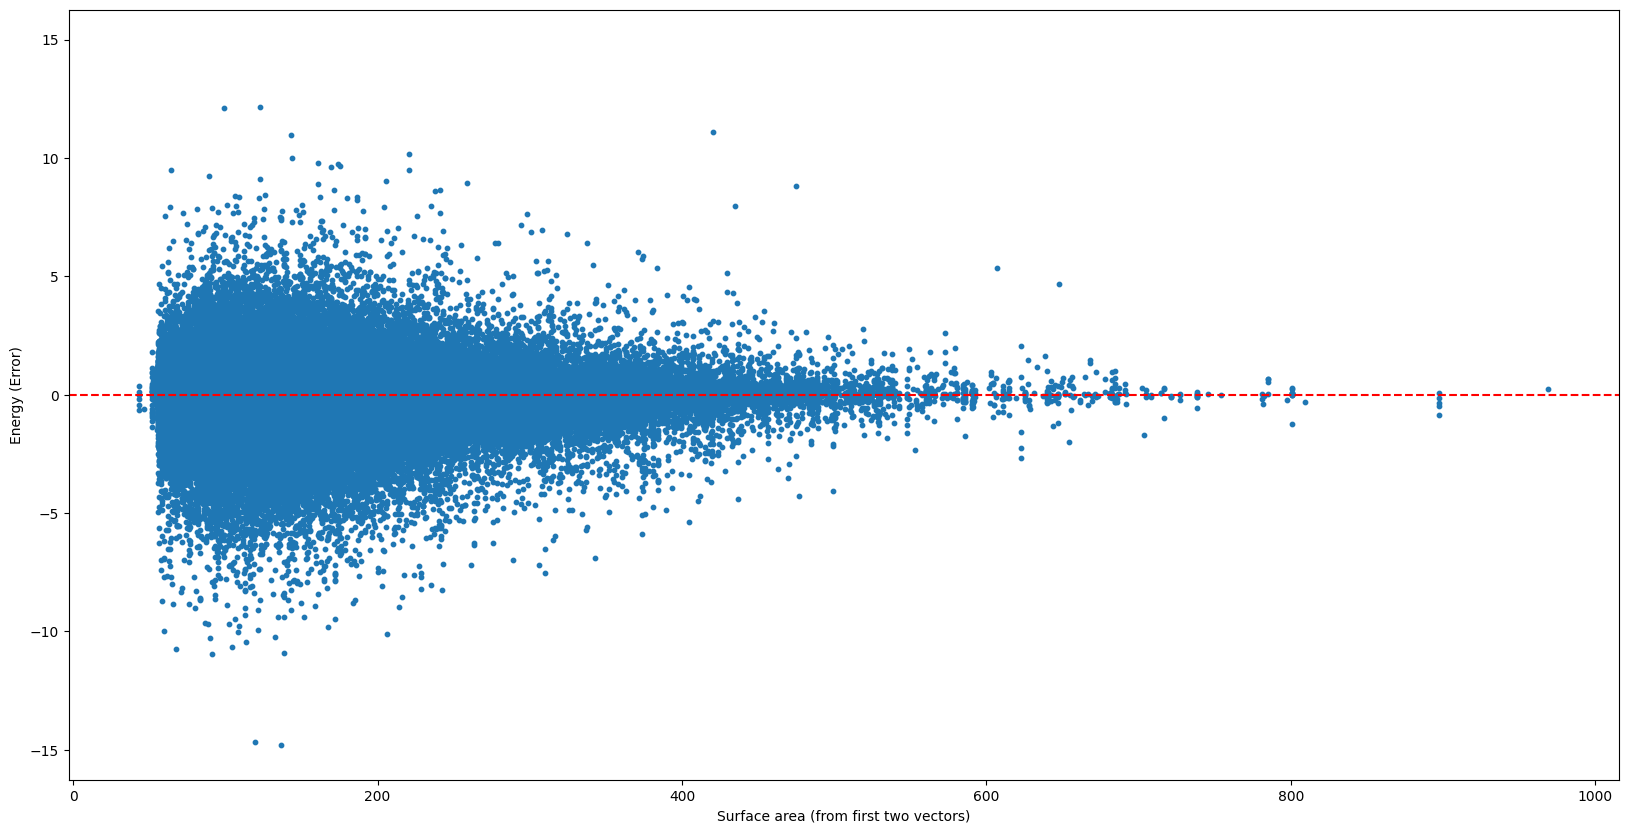

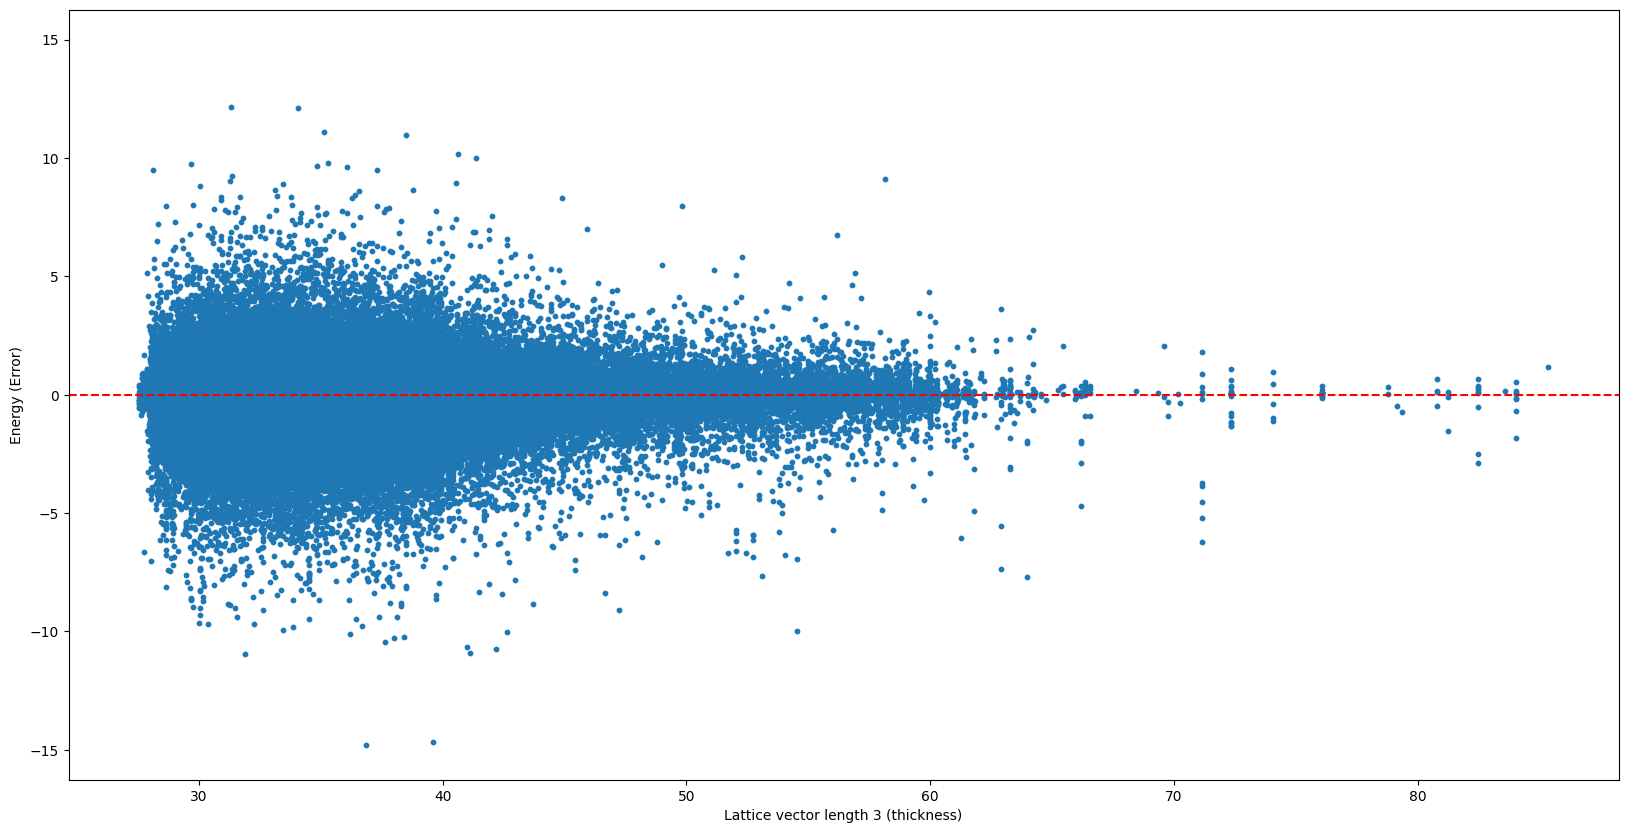

In [18]:
sort_plot_df(df, "surface area (from first two vectors)")
sort_plot_df(df, "Lattice vector length 3 (thickness)")


can try to split the unit cell into x,y,z coords
colour by spdf?
sort by element closest to adsorbate

# Distribution of Error (abs) when Sorted by Element Present (Weighted and Unweighted by number of atoms)

In [12]:
elements = ['H',
                                                                                             'B', 'C', 'N', 'O',
            'Na',                                                                           'Al', 'Si', 'P', 'S', 'Cl',
            'K', 'Ca',      'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',      'Ga', 'Ge', 'As', 'Se',
            'Rb', 'Sr',     'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd',      'In', 'Sn', 'Sb', 'Te', 
            'Cs',           'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',            'Tl', 'Pb', 'Bi']

#extract list of elements
#elements = []
#for i in range(len(df)):
#    elements += dataset_list[i].get_chemical_symbols()
#    elements = [*set(elements)]

unweighted_mean_errors = []
weighted_errors = []
weighted_mean_errors = []
bar_colors = []
print("   Unweighted Error     Weighted Error        no. of unit cells it is present in")
for count, element in enumerate(elements):    
    df_filtered = df[df['chemical formula'].str.contains(element)].reset_index(drop=True)

    unweighted_mean_error = df_filtered["energy (error)"].abs().mean() # absolute value is used
    unweighted_mean_errors.append(unweighted_mean_error)

    for i in range(len(df_filtered)):
        number_of_element_atom = df_filtered["chemical formula"][i].split(element)[1][:2]
        number_of_element_atom = ''.join(char for char in number_of_element_atom if char.isdigit())
        if number_of_element_atom == "":
            number_of_element_atom = 1
        else:
            number_of_element_atom = int(number_of_element_atom)
        weight = number_of_element_atom/df_filtered["number of atoms"][i]
        weighted_errors.append(df_filtered["energy (error)"].abs()[i] * weight)
    weighted_mean_errors.append(np.mean(weighted_errors))
    bar_colors.append((31/255, 119/255, 180/255, len(df_filtered)/378922))
    print(f'{element}: {unweighted_mean_error}   {weighted_mean_errors[count]}    {len(df_filtered)}')

   Unweighted Error     Weighted Error        no. of unit cells it is present in
H: 0.4612352730375656   0.02486500808796237    378922
B: 0.419941457071864   0.024856917508490742    10024
C: 0.4615936254279134   0.022278182294848282    348795
N: 0.5733171933479433   0.027667061561548682    178590
O: 0.5198043468931268   0.02397163607615056    310952
Na: 0.4024911281340456   0.02517736354729369    13223
Al: 0.4772423483277281   0.030407621260903513    40268
Si: 0.5262975067062636   0.03524695817768063    37767
P: 0.4209632344887535   0.03833738974816054    87122
S: 0.5410515918260161   0.04515589603176247    173261
Cl: 0.7345260887149517   0.04747376181461966    9533
K: 0.446133146942762   0.04819790445467637    12155
Ca: 0.4693252305540528   0.05038332392737901    27131
Sc: 0.4924482607519352   0.05245103075614181    22594
Ti: 0.5317298589664033   0.056554006768013705    40396
V: 0.5446696311371128   0.058720343225563465    21350
Cr: 0.5643356305531468   0.05984857549571168    13981
Mn

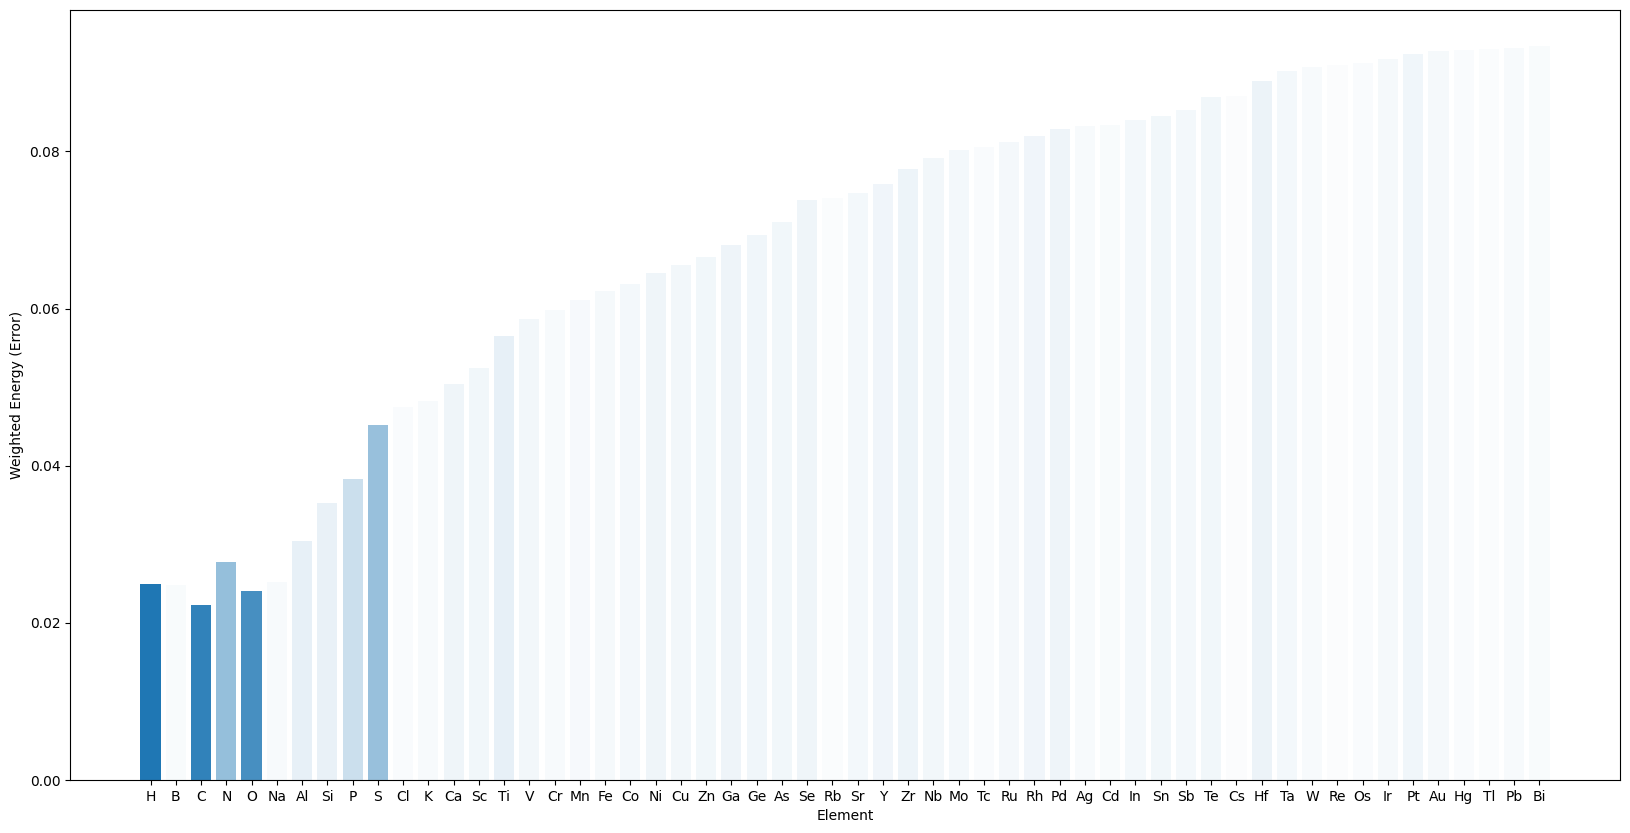

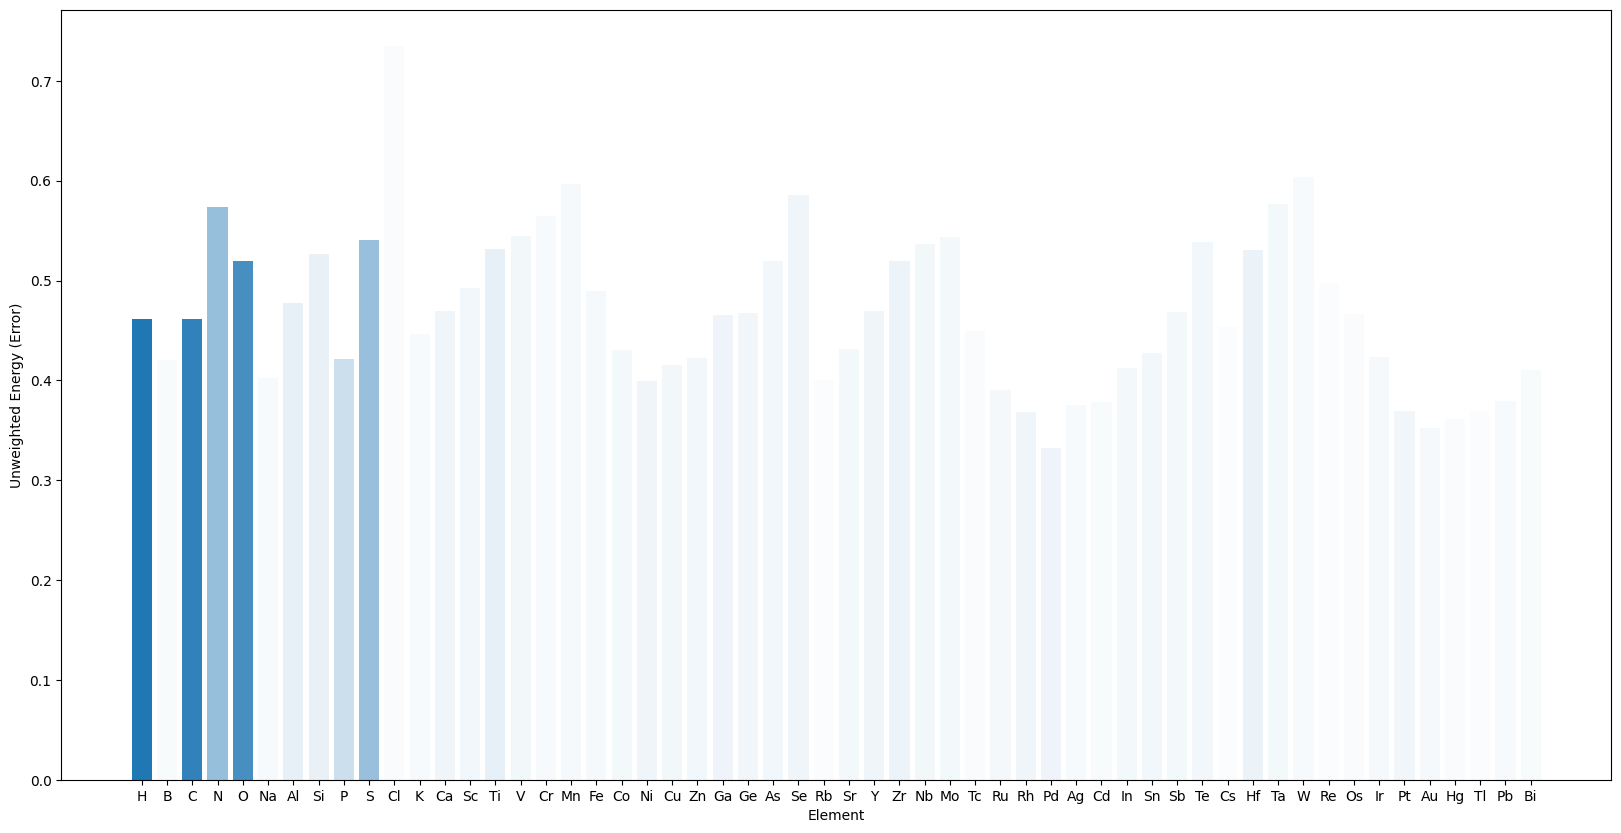

In [13]:
plt.figure(figsize=(20,10))
plt.xlabel('Element')
plt.ylabel("Weighted Energy (Error)")
plt.bar(elements, weighted_mean_errors, color=bar_colors)
plt.show()


plt.figure(figsize=(20,10))
plt.xlabel('Element')
plt.ylabel("Unweighted Energy (Error)")
plt.bar(elements, unweighted_mean_errors, color=bar_colors)
plt.show()